This workbook investigates how to find the "turnover" in a graph with irregular x binning, without performing a fit (since we want to eliminate the region beyong the turnover from the fit - corresponds to trigger tower saturation).

The "turnover" is where the gradient changes from -ve to + ve. We can calculate a simple derivative, then "smooth" it a bit by creating a moving average, to reduce influence from noise.

NB one could just ask for the minimum of the graph points, however this can suffer from random fluctuations that could bias the turnover too high or too low. If our method above works well, then we should recover the minimum of the graph for a well-behaved graph

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.figsize'] = (10.0, 5.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12

Some example graph points, take from a MC sample in an eta bin.

In [2]:
XXX = np.array([   3.90425224,    4.95344016,    6.17364846,    7.59955356,
          9.18639516,   11.01266861,   12.96581812,   15.02127055,
         17.19765665,   19.54526706,   21.92482088,   24.46384667,
         27.00070678,   29.58009579,   32.21696993,   34.99421823,
         37.74538936,   40.52145973,   43.39993616,   46.50077971,
         49.45434068,   52.1682487 ,   55.17155583,   58.31144252,
         61.42115689,   64.45573816,   67.3338833 ,   70.78238552,
         73.69966556,   76.96671328,   79.93604261,   83.4691637 ,
         86.59482235,   89.76568577,   92.9057818 ,   96.20887446,
         99.50687183,  102.90240509,  106.32141319,  109.45360507,
        112.91747709,  116.04402773,  119.68350112,  122.6301595 ,
        126.10220003,  129.35170552,  133.0845873 ,  136.51251572,
        139.69004151,  143.10707988,  146.62209743,  150.18164054,
        153.42908313,  157.06124813,  160.46543337,  163.90621694,
        167.59660741,  170.62542559,  174.29432474,  177.78820179,
        181.07945554,  184.11284517,  187.61819694,  191.36688503,
        194.82853645,  197.61450219,  201.40172211,  205.29794934,
        208.53597966,  211.66171991,  215.69507739,  218.32482347,
        221.56040107,  225.79194343,  228.89609919,  232.49477086,
        235.83662484,  238.59510484,  242.39740937,  245.7725057 ,
        248.88002518,  251.72743506,  255.61060865,  265.21243608,
        281.71257197,  297.72402919,  313.25707025,  328.64702896,
        343.49491684,  357.8443706 ,  371.81482315,  386.1524696 ,
        399.74261657,  412.89099263,  424.9273616 ,  438.08675348,
        449.55969052,  461.32842864,  472.47262807,  484.36123296,
        494.42223594,  505.9223209 ,  516.33989652,  524.68138717,
        535.38520748,  545.43114765,  552.93253568,  565.21073124,
        572.91708385,  581.41245251,  587.5595487 ,  595.60300489,
        606.52728001,  612.44479102,  620.31224954,  630.15387708,
        635.76151114])
YYY = np.array([ 4.1057008 ,  4.62941483,  5.06679564,  4.38277182,  3.98655693,
        3.62252179,  3.35275619,  3.13735331,  2.90929503,  2.76417337,
        2.63253262,  2.51256535,  2.39229118,  2.33271429,  2.25374075,
        2.17424131,  2.12661887,  2.07070275,  2.02765818,  1.97822136,
        1.93764667,  1.90469579,  1.8808579 ,  1.8401378 ,  1.81037123,
        1.78407042,  1.77027585,  1.74629389,  1.72188297,  1.70396606,
        1.68802088,  1.65885746,  1.64658351,  1.63281973,  1.61940684,
        1.60767047,  1.59057928,  1.58153298,  1.56384963,  1.55678591,
        1.54517335,  1.53564313,  1.5210892 ,  1.5181483 ,  1.50741795,
        1.49413272,  1.48519228,  1.47857609,  1.47602538,  1.46160031,
        1.45609174,  1.45209956,  1.44216933,  1.43758191,  1.42369347,
        1.42147119,  1.41906238,  1.41507397,  1.4092782 ,  1.39869107,
        1.39978512,  1.3955445 ,  1.38922478,  1.38715352,  1.38063007,
        1.37541252,  1.37042948,  1.36602729,  1.36635869,  1.36264014,
        1.35297833,  1.35696473,  1.3530098 ,  1.35202579,  1.34280116,
        1.33911897,  1.33857954,  1.33774784,  1.33284019,  1.33011336,
        1.32911215,  1.33589825,  1.32454158,  1.32007353,  1.31259575,
        1.30565381,  1.29615038,  1.29430058,  1.29618787,  1.29241157,
        1.29443252,  1.29596477,  1.29969502,  1.30124762,  1.30453839,
        1.29927866,  1.30202639,  1.30979191,  1.30975957,  1.32526421,
        1.33146361,  1.33592766,  1.34931215,  1.31995603,  1.34743665,
        1.35610696,  1.36261211,  1.3516015 ,  1.42631026,  1.43919469,
        1.46375981,  1.48695821,  1.48872924,  1.5326427 ,  1.53666225,
        1.55923594,  1.57960565])

In [3]:
ms = 4  # marker size

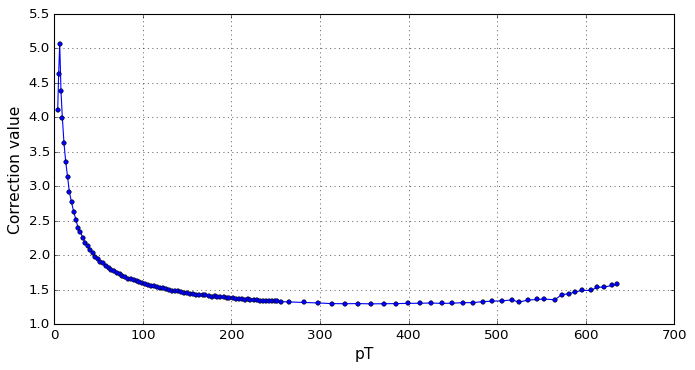

In [4]:
plt.plot(XXX, YYY, 'bo-', ms=ms)
plt.grid(which='both')
plt.xlabel('pT')
plt.ylabel('Correction value')

Zoom in a bit:

minimum: 357.8443706


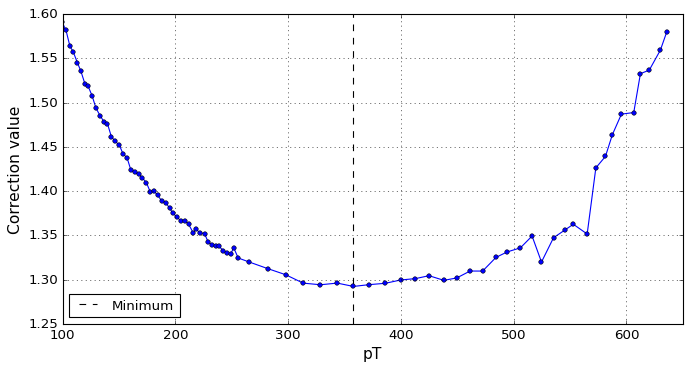

In [45]:
plt.plot(XXX, YYY, 'bo-', ms=ms)
plt.grid(which='both')
plt.xlabel('pT')
plt.ylabel('Correction value')
plt.xlim(100, 650)
plt.ylim(1.25, 1.6)
plt.vlines(XXX[list(YYY).index(min(YYY))], *plt.ylim(), linestyle='dashed', label='Minimum')  # minimum of array
plt.legend(loc=0)
print 'minimum:', XXX[list(YYY).index(min(YYY))]

Plot the gradient using `np.gradient`:

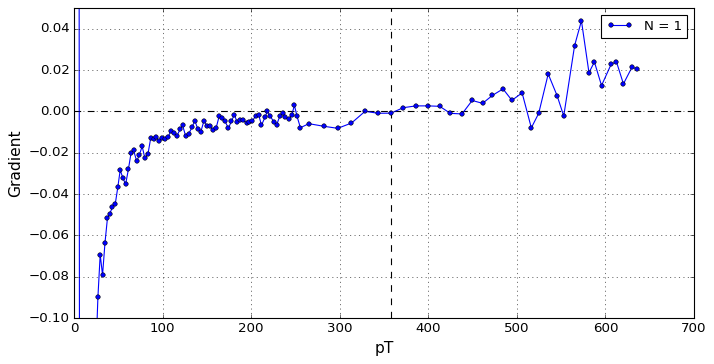

In [49]:
plt.plot(XXX, np.gradient(YYY, 1), 'o-', ms=ms, label='N = 1')
plt.legend(loc=0)
plt.hlines(0, *plt.xlim(), linestyle='dashed')
plt.ylim(-0.1, 0.05)
plt.grid(which='both')
plt.xlabel('pT')
plt.ylabel('Gradient')
plt.vlines(XXX[list(YYY).index(min(YYY))], *plt.ylim(), linestyle='dashed', label='Minimum')  # minimum of array

In [9]:
def moving_average(arr, n):
    return [np.mean(arr[i:i + n]) for i in range(0, len(arr) - n + 1)]

Try and do some smoothing by a moving averaging over n consecutive points.

Playing with the number of points to average over:

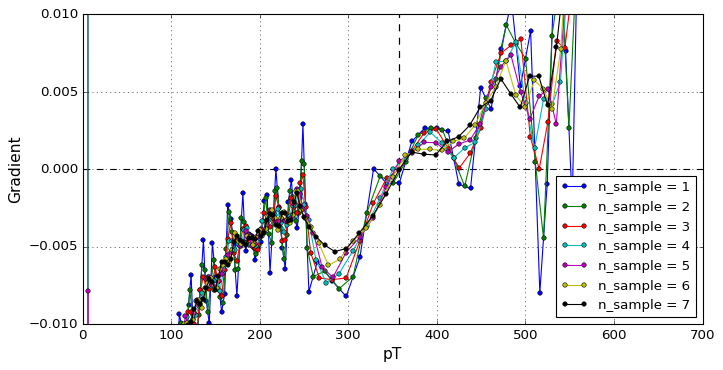

In [52]:
for n_sample in range(1, 8, 1):

    ave_x = np.array(moving_average(XXX, n_sample))
    
    order = 1
    grad = np.gradient(YYY, order)
    ave_y = np.array(moving_average(grad, n_sample))
    plt.plot(ave_x, ave_y, 'o-', ms=ms, label='n_sample = %g' % (n_sample))
plt.legend(loc=0)
plt.hlines(0, *plt.xlim(), linestyle='dashed')
# plt.xlim(100, 500)
plt.ylim(-1E-2, 1E-2)
# plt.xlim(300, 400)
# plt.ylim(-1E-3, 1E-3)
plt.grid(which='both')
plt.vlines(357.59072183, *plt.ylim(), linestyle='dashed')
plt.xlabel('pT')
plt.ylabel('Gradient')
plt.vlines(XXX[list(YYY).index(min(YYY))], *plt.ylim(), linestyle='dashed', label='Minimum')  # minimum of array

Choosing the number of points to average over is tricky - too few, and the average is still too noisy, but too many, and you lose details, and the ability to calculate the x-intercept precisely.

For example, compare a small and large number to sample:

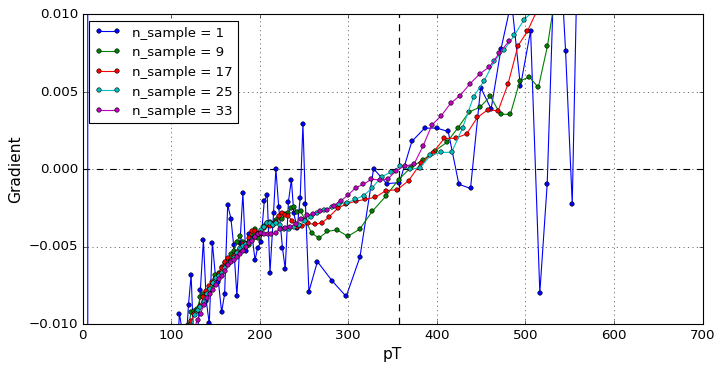

In [42]:
for n_sample in range(1, 34, 8):

    ave_x = np.array(moving_average(XXX, n_sample))
    
    order = 1
    grad = np.gradient(YYY, order)
    ave_y = np.array(moving_average(grad, n_sample))
    plt.plot(ave_x, ave_y, 'o-', ms=ms, label='n_sample = %d' % (n_sample))
plt.legend(loc=2)
plt.hlines(0, *plt.xlim(), linestyle='dashed')
# plt.xlim(100, 500)
plt.ylim(-1E-2, 1E-2)
# plt.xlim(300, 400)
# plt.ylim(-1E-3, 1E-3)
plt.grid(which='both')
plt.vlines(357.59072183, *plt.ylim(), linestyle='dashed')
plt.xlabel('pT')
plt.ylabel('Gradient')
plt.vlines(XXX[list(YYY).index(min(YYY))], *plt.ylim(), linestyle='dashed', label='Minimum')  # minimum of array

You can see that the larger n_sample graphs tend to promote a wider range of pT values for the intercept.

And just one combination by itself:

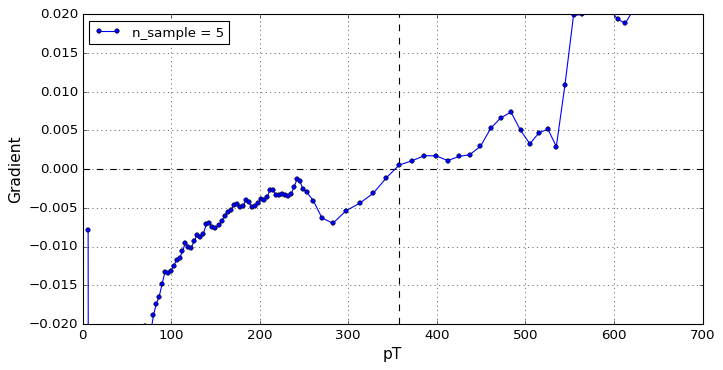

In [39]:
n_sample = 5

ave_x = np.array(moving_average(XXX, n_sample))

order = 1
grad = np.gradient(YYY, order)
ave_y = np.array(moving_average(grad, n_sample))
plt.plot(ave_x, ave_y, 'o-', ms=ms, label='n_sample = %d' % (n_sample))

plt.legend(loc=0)
plt.hlines(0, *plt.xlim(), linestyle='dashed')
plt.ylim(-2E-2, 2E-2)
plt.grid(which='both')
plt.xlabel('pT')
plt.ylabel('Gradient')
plt.vlines(XXX[list(YYY).index(min(YYY))], *plt.ylim(), linestyle='dashed', label='Minimum')  # minimum of array

Now we need some way to calculate where the gradient curve intercepts with the x-axis.

In [38]:
def calc_crossing(arr):
    """Calculate closest value where array crosses 0.
    
    Looks at points in groups of 4, and finds the smallest group 
    where the first 2 points < 0, and the next 2 points > 0.
    
    This ignores values which peak above 0 for 1 point.
    
    Returns the array (index, value) of the point closest to 0.
    """
    
    for i in range(2, len(arr)):
        group = np.concatenate((-1 * arr[i-1: i], arr[i: i+1]))
        if np.all(group > 0):
#             print group
#             print i, ave_x[i], ave_y[i-2:i+2], XXX[i-2:i+5], ave_x[i-2: i+2]
            return i - 1 + list(group).index(np.min(group)), np.min(group)

In [18]:
ind, intercept = calc_crossing(ave_y)
print ave_x[ind], intercept

357.59072183 0.000520883


That's great, but it only gives us the closest point in the *averaged* x array, not the original array of x values. Let's find the closest one in the original array to our new intercept value.

In [19]:
def closest_element(arr, value):
    """Return element in array arr that is closest to value"""
    diff_abs = np.abs(arr - value*np.ones_like(len(arr)))
    min_diff = np.min(diff_abs)
    ind = list(diff_abs).index(min_diff)
    return arr[ind]

In [82]:
closest_element(XXX, ave_x[ind])

357.84437059999999

Which is the minimum from the start! Wahey!

N.B.: we can get away with being not-so-super-accurate here - there isn't a huge difference between 360 vs 370. And if the fit fails for 370, it will automatically be redone for a slightly smaller value.